In [140]:
# Importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [141]:
from collections import Counter

In [142]:
import scipy

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
from scipy import stats
from scipy.stats import norm, skew, boxcox

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, plot_confusion_matrix, auc

In [147]:
#Initializing data set
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [148]:
#Printing columns
print(data.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [149]:
#Exploratory Data Analysis(EDA)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [150]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [151]:
#checking null values
print(data.isna().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


No null value found in dataset

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [153]:
#histogram plot function for numerical attributes
def plot_hist(parameter):
    print("min {} : {} ".format(parameter, min(data[parameter])))
    print("max {} : {}".format(parameter, max(data[parameter])))
    
    plt.figure(figsize=(9,3))
    plt.hist(data[parameter], color="darkgreen")
    plt.xlabel(parameter)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram ".format(parameter))
    plt.show()

min age : 40.0 
max age : 95.0


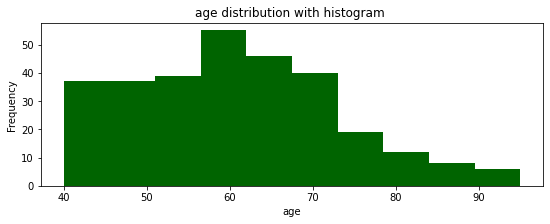

min creatinine_phosphokinase : 23 
max creatinine_phosphokinase : 7861


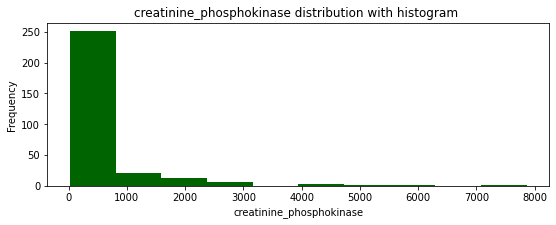

min ejection_fraction : 14 
max ejection_fraction : 80


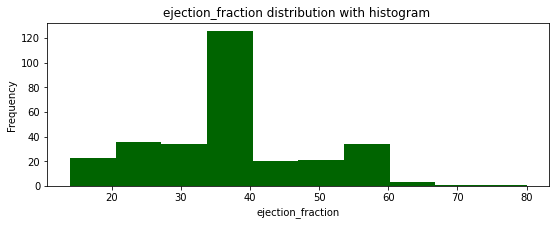

min platelets : 25100.0 
max platelets : 850000.0


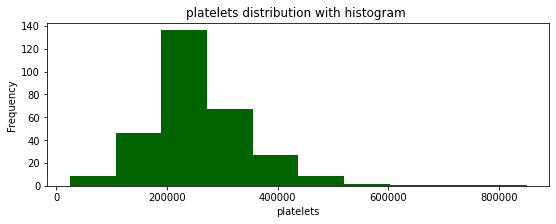

min serum_creatinine : 0.5 
max serum_creatinine : 9.4


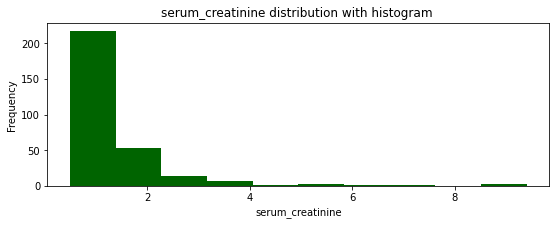

min serum_sodium : 113 
max serum_sodium : 148


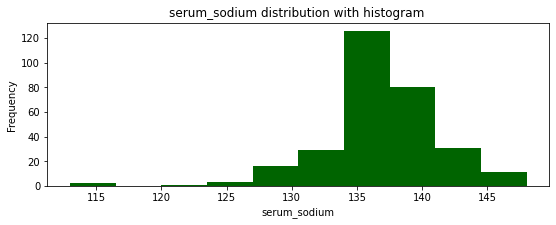

min time : 4 
max time : 285


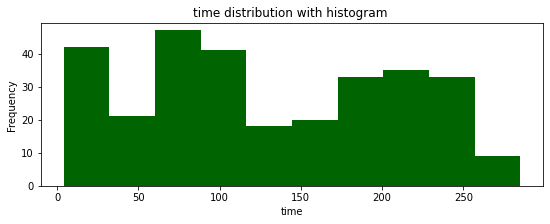

In [154]:
numericVar = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for n in numericVar:
    plot_hist(n)

In [155]:
#plotting bar plot function for categorical attributes
def bar_plot(variable):
    
    # get feature
    var = data[variable]
    #count number of categorical variable (value/sample)
    varValue = var.value_counts()

    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue,color = "darkred", edgecolor = "black", linewidth = 2)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

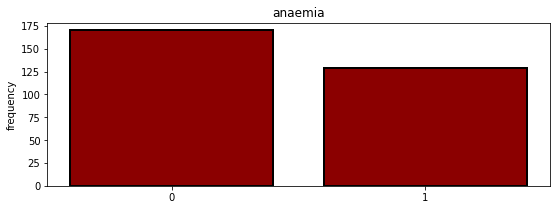

anaemia: 
 0    170
1    129
Name: anaemia, dtype: int64


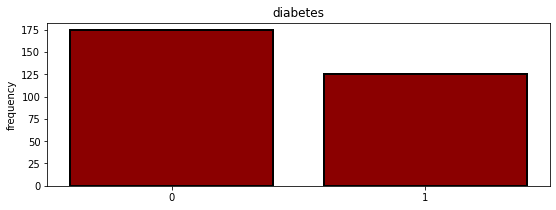

diabetes: 
 0    174
1    125
Name: diabetes, dtype: int64


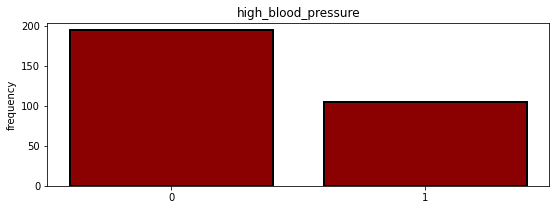

high_blood_pressure: 
 0    194
1    105
Name: high_blood_pressure, dtype: int64


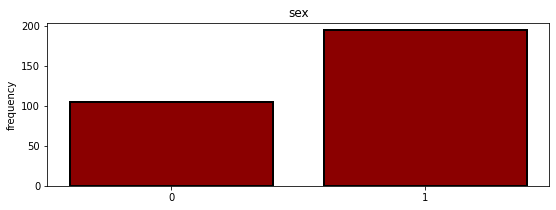

sex: 
 1    194
0    105
Name: sex, dtype: int64


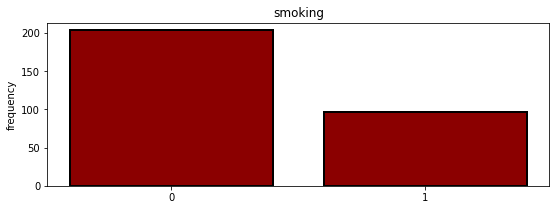

smoking: 
 0    203
1     96
Name: smoking, dtype: int64


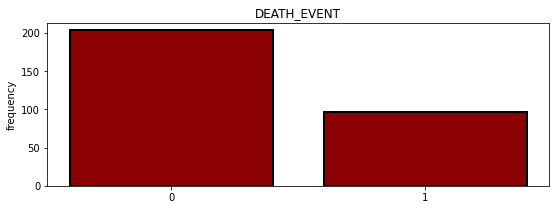

DEATH_EVENT: 
 0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [156]:
category = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
for c in category:
    bar_plot(c)

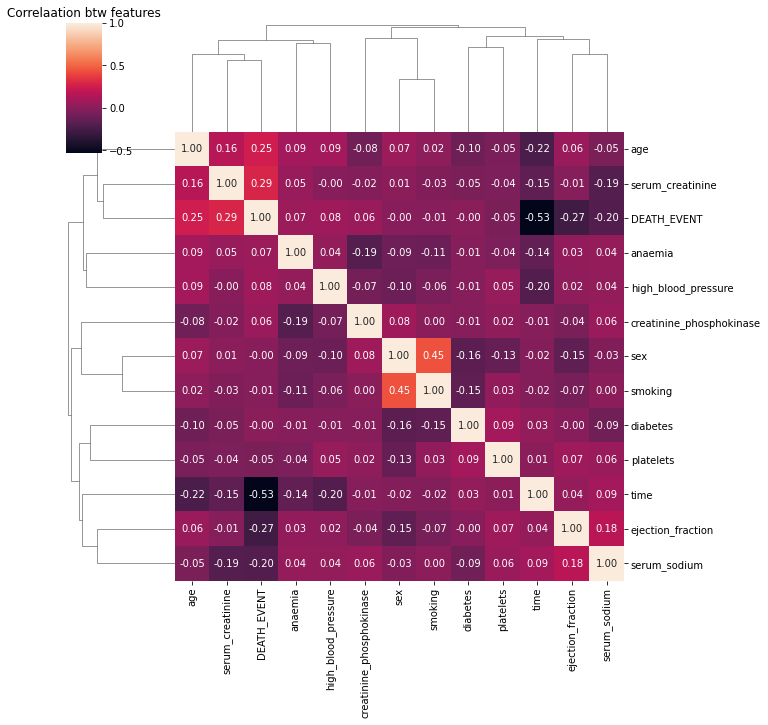

In [157]:
#correlation matrix for finding correlated features and features having correlation value more than threshold 0.2 
#with target attribute Death_Event 
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlaation btw features")
plt.show()

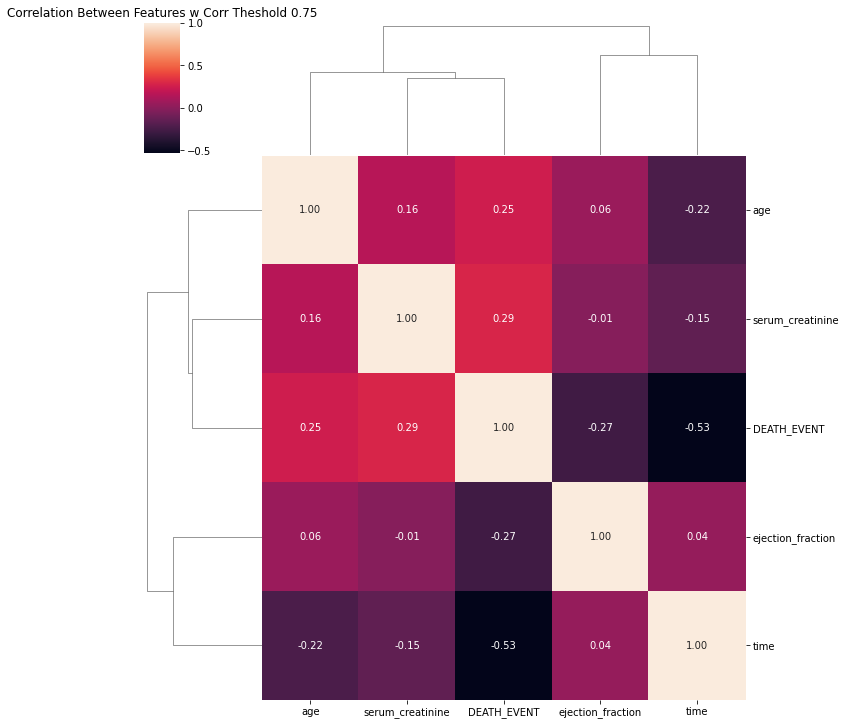

In [158]:
#correaltion matrix after feature selection(by removing features with threshold less than 0.2)
threshold = 0.2 
filtre = np.abs(corr_matrix["DEATH_EVENT"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

No correlated features(features having value >0.75) found after feature selection

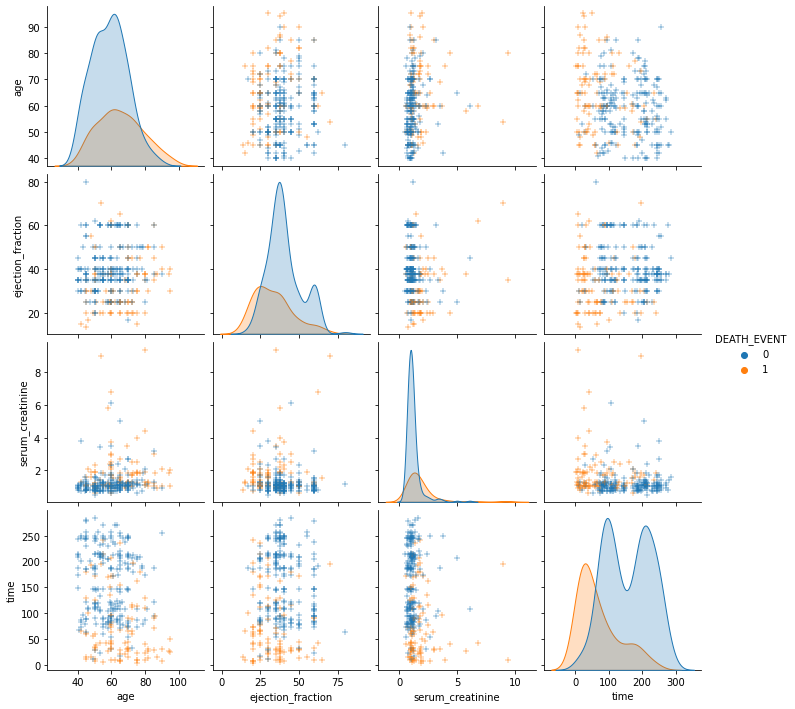

In [159]:
#pairplot after feature selection
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+", hue = "DEATH_EVENT")
plt.show()


In [160]:
#We have done Outlier Detection using the 1.5 IQR rule and removed the outliers from the dataset. 
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1) 
    
    return multiple_outliers

In [161]:
#displaying outliers
data.loc[detect_outliers(data,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"])]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
163,50.0,1,2334,1,35,0,75000.00,0.9,142,0,0,126,1
200,63.0,1,1767,0,45,0,73000.00,0.7,137,1,0,186,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1
117,85.0,1,102,0,60,0,507000.00,3.2,138,0,0,94,0
167,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,135,1
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,250,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [162]:
#removing outliers
data = data.drop(detect_outliers(data,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]),axis = 0).reset_index(drop=True)

In [163]:
#Finding skewness value(distortion)
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness

,skewed
creatinine_phosphokinase,4.827396
serum_creatinine,4.605615
platelets,1.429547
DEATH_EVENT,0.797132
smoking,0.729243
high_blood_pressure,0.583959
ejection_fraction,0.546146
age,0.413840
diabetes,0.358569
anaemia,0.286636


We have displayed distplot before and after having distorted data.We have used boxcox function to remove distorted data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


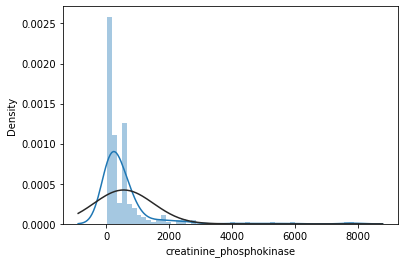

mu creatinine_phosphokinase : 553.121107266436, sigma creatinine_phosphokinase : 943.411428667967



In [164]:
# creatinine_phosphokinase 
sns.distplot(data["creatinine_phosphokinase"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["creatinine_phosphokinase"])
print("mu {} : {}, sigma {} : {}".format("creatinine_phosphokinase", mu, "creatinine_phosphokinase", sigma))
print()

In [165]:
data["creatinine_phosphokinase"], lam = boxcox(data["creatinine_phosphokinase"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


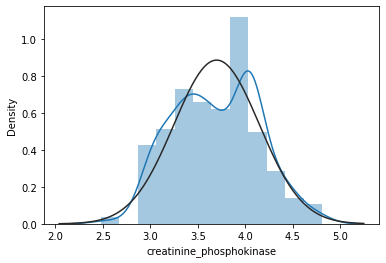

mu creatinine_phosphokinase : 3.698843171315633, sigma creatinine_phosphokinase : 0.4504255141000855



In [166]:
# creatinine_phosphokinase
sns.distplot(data["creatinine_phosphokinase"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["creatinine_phosphokinase"])
print("mu {} : {}, sigma {} : {}".format("creatinine_phosphokinase", mu, "creatinine_phosphokinase", sigma))
print()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


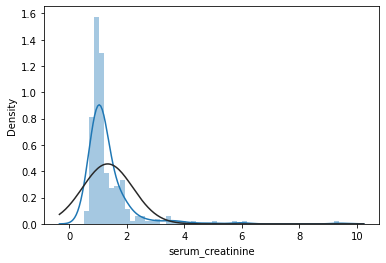

mu serum_creatinine : 1.333114186851211, sigma serum_creatinine : 0.8748528244624999



In [167]:
# serum_creatinine
sns.distplot(data["serum_creatinine"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["serum_creatinine"])
print("mu {} : {}, sigma {} : {}".format("serum_creatinine", mu, "serum_creatinine", sigma))
print()

In [168]:
data["serum_creatinine"], lam_serum_creatine = boxcox(data["serum_creatinine"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


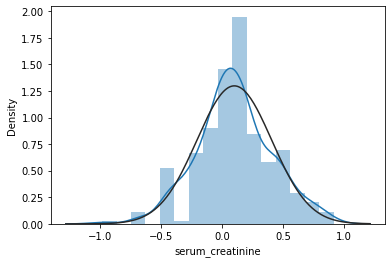

mu serum_creatinine : 0.10109147159013519, sigma serum_creatinine : 0.3073176761803753



In [169]:
# serum_creatinine
sns.distplot(data["serum_creatinine"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["serum_creatinine"])
print("mu {} : {}, sigma {} : {}".format("serum_creatinine", mu, "serum_creatinine", sigma))
print()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


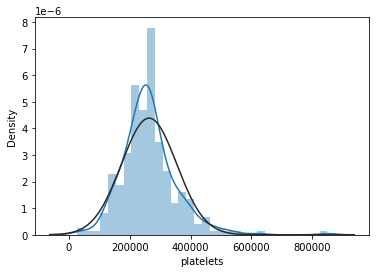

mu platelets : 263597.55266435986, sigma platelets : 90929.19587502987



In [170]:
# platelets
sns.distplot(data["platelets"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["platelets"])
print("mu {} : {}, sigma {} : {}".format("platelets", mu, "platelets", sigma))
print()

In [171]:
data["platelets"], lam_serum_creatine = boxcox(data["platelets"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


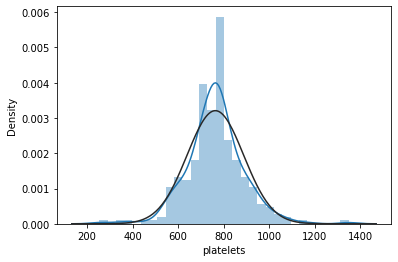

mu platelets : 763.3363077948457, sigma platelets : 124.37245302525076



In [172]:
# platelets
sns.distplot(data["platelets"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["platelets"])
print("mu {} : {}, sigma {} : {}".format("platelets", mu, "platelets", sigma))
print()

In [173]:
#finding skewness value of attributes after removing distortions
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness_new = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness_new

,skewed
DEATH_EVENT,0.797132
smoking,0.729243
high_blood_pressure,0.583959
ejection_fraction,0.546146
age,0.413840
diabetes,0.358569
anaemia,0.286636
platelets,0.153154
time,0.125442
creatinine_phosphokinase,0.038332


Creating Train and Test data for model.

In [175]:
#Splitting features and target variable
X = data.drop("DEATH_EVENT", axis = 1)
y = data.DEATH_EVENT


In [176]:
#Creating X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train and X_test have all the features which are not required for building model.We have already done feature selection as mentioned above.So, we have to select only those features for our model’s  x_train_model and x_test_model. 


In [193]:
#creating x_train_model and x_test_model
x_train_model = X_train[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","time"]]
x_test_model = X_test[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","time"]]

In [200]:
x_train_model.head(250)


,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,time
191,65.0,3.517880,30,-0.248892,186
217,75.0,4.079584,60,0.287464,205
226,53.0,4.025638,45,0.091073,209
134,62.0,3.741661,35,0.000000,108
171,49.0,3.093257,50,0.000000,147
...,...,...,...,...,...
251,53.0,2.984074,50,-0.425477,231
192,50.0,4.025638,20,0.000000,186
117,66.0,3.085737,38,0.000000,95
47,57.0,3.399878,30,0.000000,42


In [201]:
x_test_model.head(250)


,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,time
55,49.000,4.135033,20,0.091073,55
182,60.667,3.472416,40,0.000000,172
92,58.000,3.414085,60,0.000000,83
209,70.000,4.278013,50,-0.110883,196
261,40.000,4.025638,35,0.000000,244
...,...,...,...,...,...
212,73.000,4.025638,20,0.458323,198
153,50.000,3.692970,25,0.000000,120
161,53.000,3.588696,60,-0.425477,134
116,60.000,4.110975,60,0.335766,95


In [202]:
y_train.head(250)


191    0
217    0
226    0
134    0
171    0
      ..
251    0
192    0
117    0
47     1
172    0
Name: DEATH_EVENT, Length: 216, dtype: int64

In [203]:
y_test.head(250)

55     1
182    0
92     0
209    0
261    0
      ..
212    1
153    0
161    0
116    0
252    0
Name: DEATH_EVENT, Length: 73, dtype: int64

Building Random Forest Classifier

In [205]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train_model, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [208]:
#Predicting test data
y_pred = classifier.predict(x_test_model)


comparing predicting result with test result.

In [211]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0])

In [212]:
y_test

55     1
182    0
92     0
209    0
261    0
      ..
212    1
153    0
161    0
116    0
252    0
Name: DEATH_EVENT, Length: 73, dtype: int64

Evaluating accuracy of model

In [220]:
#Confusion matrix and accuracy.
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix :')
print(cm)
print('accuracy score :')
accuracy_score(y_test, y_pred)

confusion matrix :
[[48  3]
 [ 8 14]]
accuracy score :


0.8493150684931506